# CM2604 Machine Learning Coursework

#### Fathima Khadheeja Alam 
#### RGU ID: 2331411
#### IIT ID: 20232099

## Summary of tasks covered
1. Importing and analysing data present with charts and graphs
2. Feature selection and encoding categorical variables
3. Training a basic random forest regressor on the encoded data
4. Using grid search to find the best hyperparameters

In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [629]:
data = pd.read_csv('../data/bank.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [630]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4964,no


In [631]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [632]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [633]:
# Drop duplicates
duplicates = data.duplicated()
print(duplicates.sum())
data.drop_duplicates(inplace=True)

12



Target Variable Distribution (%):
y
no     36537
yes     4639
Name: count, dtype: int64


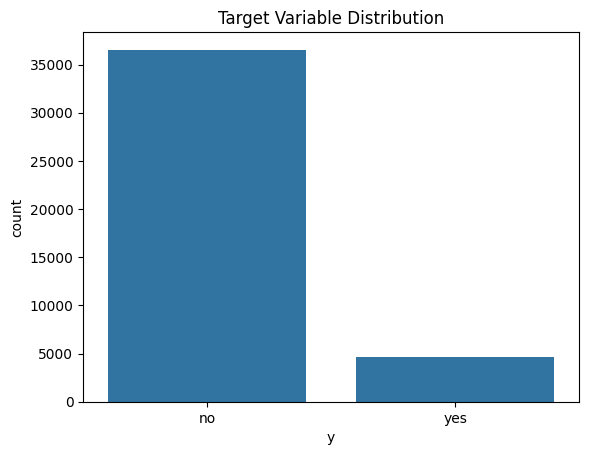

In [634]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable distribution
target_distribution = data['y'].value_counts()
print("\nTarget Variable Distribution (%):")
print(target_distribution)

# Plotting target variable distribution
sns.countplot(x='y', data=data)
plt.title("Target Variable Distribution")
plt.show()


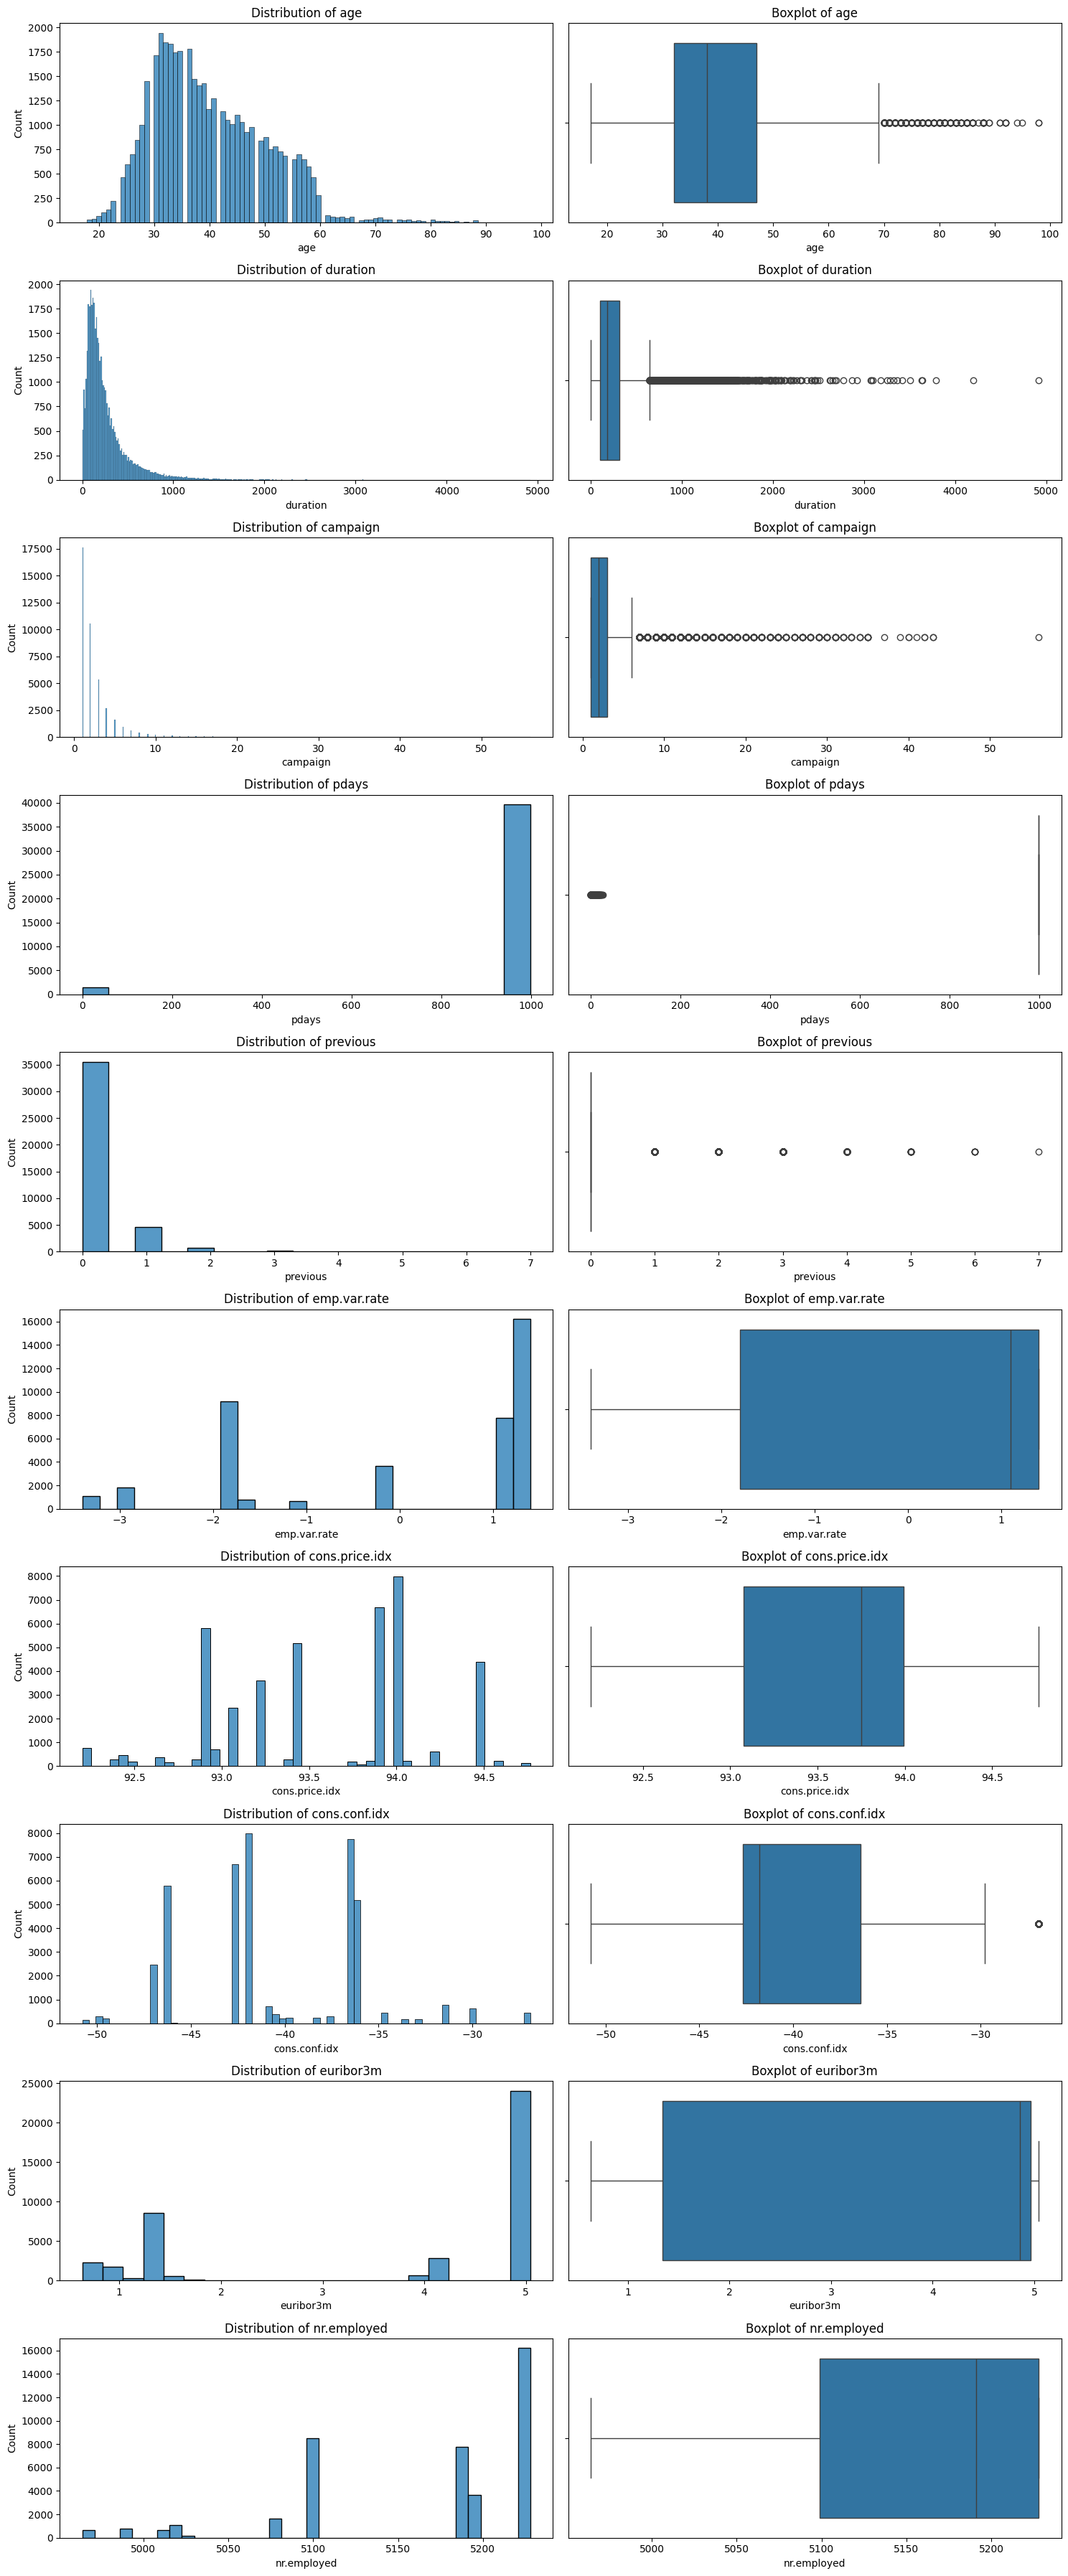

In [635]:
# Selecting numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns


# Create subplots for the box plots before and after outlier handling
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 36))

# Visualizing distributions
for i, feature in enumerate(numerical_features):
    sns.histplot(x=data[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature}")
    sns.boxplot(x=data[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot of {feature}")

    
plt.tight_layout()
plt.show()


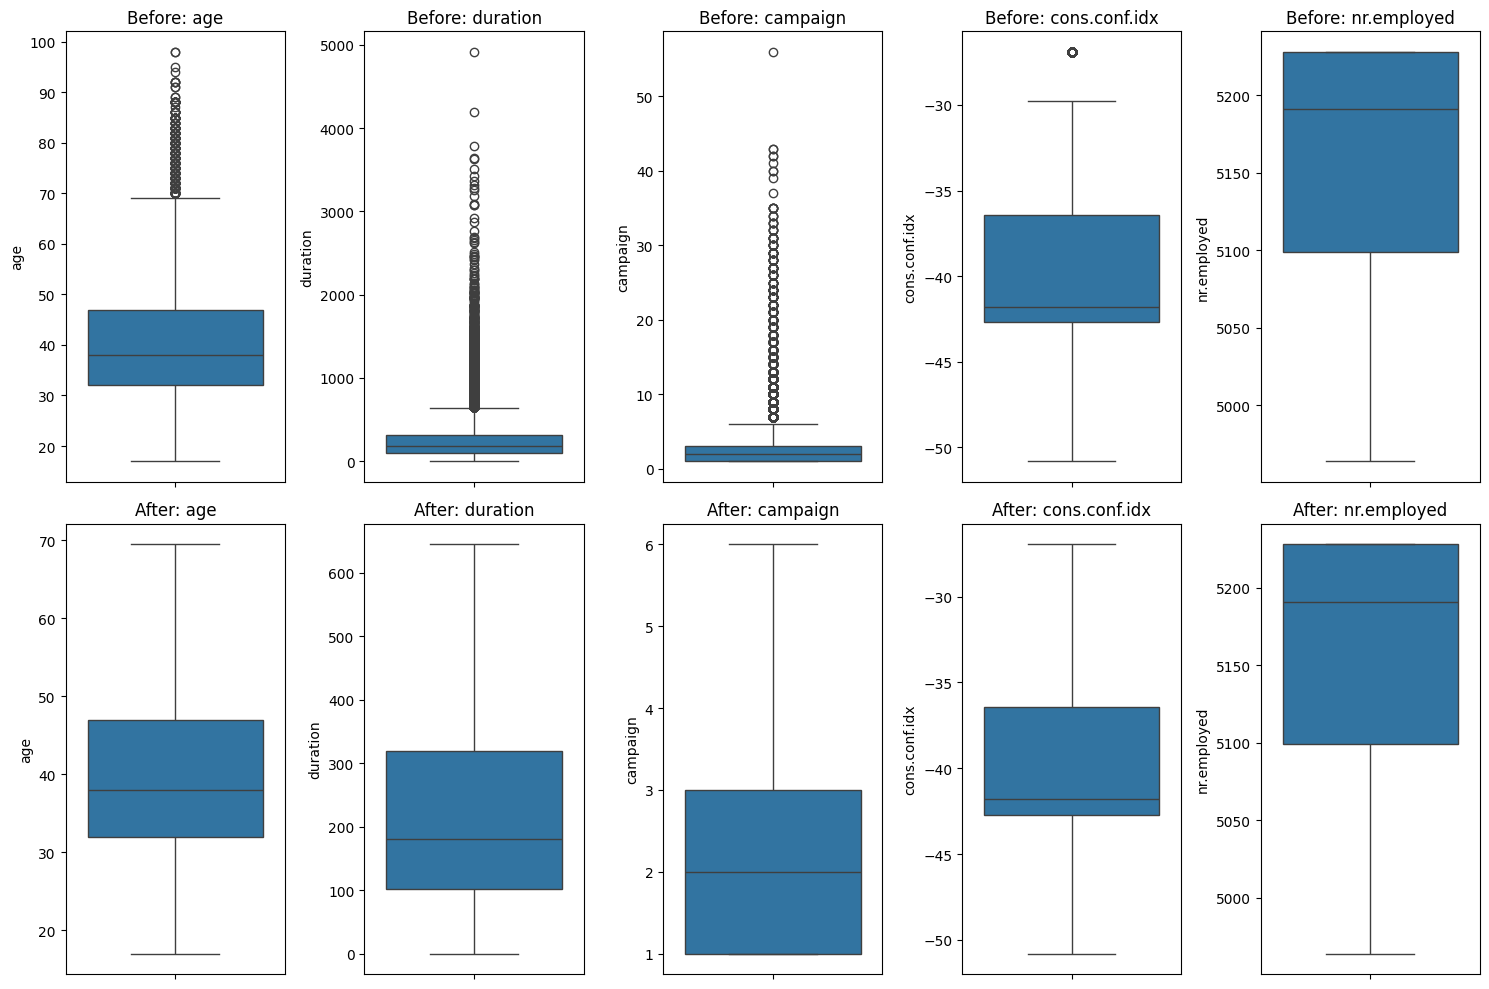

In [636]:
# Function to handle outliers
def handle_outliers_iqr(column):
    # Calculate quartiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count occurrences of outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    outlier_count = outliers.sum()

    return column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    

# Replace the 999 for no days visited with 0
data['pdays'] = data['pdays'].replace(999, 0)
data_cleaned = data.copy()

numerical_cols = ['age', 'duration','campaign', 'cons.conf.idx', 'nr.employed']
# Apply outlier handling for each numerical column
for column in numerical_cols:
    data_cleaned[column] = handle_outliers_iqr(data[column])

# Create subplots for the box plots before and after outlier handling
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_cols), figsize=(15, 10))

# Plot box plots before outlier handling
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=data[column], ax=axes[0, i])
    axes[0, i].set_title(f'Before: {column}')

# Plot box plots after outlier handling
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=data_cleaned[column], ax=axes[1, i])
    axes[1, i].set_title(f'After: {column}')

data_cleaned.to_csv('../data/data_cleaned.csv', index=False)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [637]:
data = pd.read_csv("../data/data_cleaned.csv")

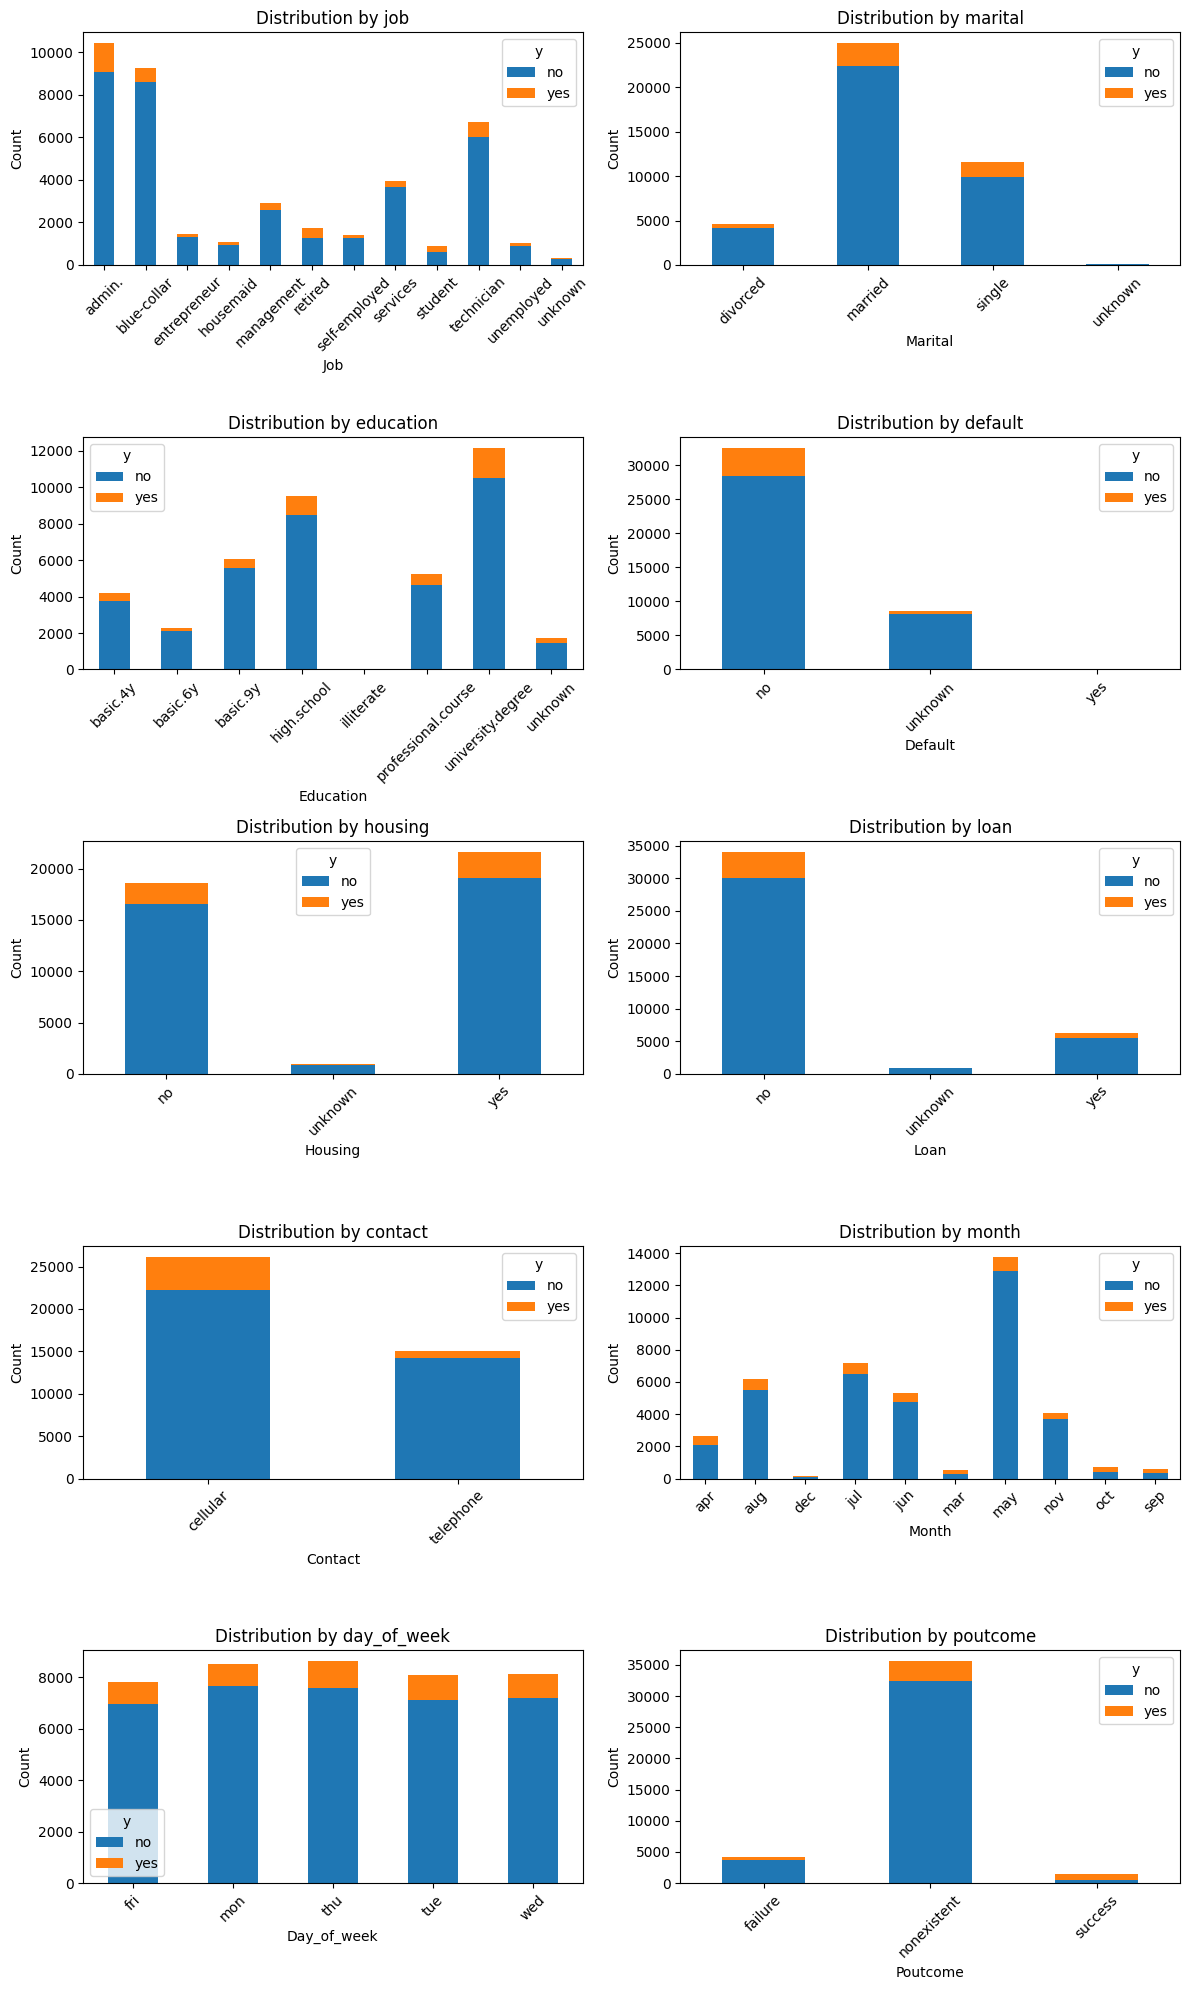

In [638]:
# List of categorical columns to plot
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Number of columns per row
cols_per_row = 2
num_rows = (len(columns) + cols_per_row - 1) // cols_per_row

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, num_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate through axes

# Loop through columns and plot
for idx, col in enumerate(columns):
    ax = axes[idx]  # Get the corresponding axis
    data.groupby([col, 'y']).size().unstack().plot(
        kind='bar', stacked=True, ax=ax, legend=True
    )
    ax.set_title(f"Distribution by {col}")  # Set title
    ax.set_ylabel('Count')  # Set y-axis label
    ax.set_xlabel(col.capitalize())  # Set x-axis label
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="y")  # Add legend title

# Hide unused subplots if any
for ax in axes[len(columns):]:
    ax.set_visible(False)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [639]:
for i in data.select_dtypes(include=['object']).columns:
    print(data[i].value_counts())
    print('\n')

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64


education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64


default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64


housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64


loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64


contact
cellular     26135
telephone    15041
Name: coun

In [640]:
data = data.drop(data[data['job'] == 'unknown'].index, axis =0, inplace=False)
data = data.drop(data[data['loan'] == 'unknown'].index, axis =0, inplace=False)
data = data.drop(data[data['housing'] == 'unknown'].index, axis =0, inplace=False)
data = data.drop(data[data['marital'] == 'unknown'].index, axis =0, inplace=False)

In [641]:
data.shape

(39791, 21)

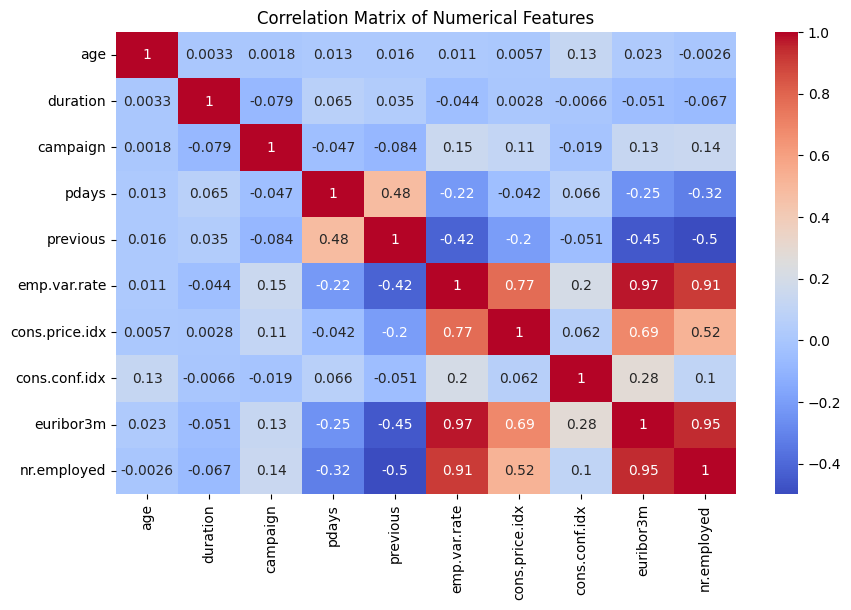

In [642]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()



## Encoding categorical variables

Test encoding in different methods

One hot encoding: marital, poutcome, contact

Binary encoding: loan, housing, default, job

Ordinal encoding: education

sin/cosine encoding: month, day_of_week

In [643]:
# Using ordinal encoding for y
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['no','yes']])
data['y_encoded'] = encoder.fit_transform(data[['y']])

# Using dummy encoding to encode marital, poutcome, contact
to_dummy_cols = pd.DataFrame(data[['marital', 'poutcome','contact']])
dummy_cols = pd.get_dummies(to_dummy_cols)


# Using binary encoding for loan, housing, default, y
from category_encoders import BinaryEncoder 
encoder = BinaryEncoder(cols =['loan', 'housing' ,'default', 'job']) 
# Transforming the column after fitting
newdata = encoder.fit_transform(data[['loan', 'housing' ,'default', 'job']])

# Using ordinal encoding for education
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["illiterate","unknown","basic.4y","basic.6y","basic.9y","high.school","professional.course","university.degree"]])
data['education_encoded'] = encoder.fit_transform(data[['education']])

# Sin/cosine encoding for month, day_of_week
# Map categorical values to numerical values
month_mapping = {month: i+1 for i, month in enumerate(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                                       'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])}
day_mapping = {day: i+1 for i, day in enumerate(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])}

data['month_num'] = data['month'].map(month_mapping)
data['day_num'] = data['day_of_week'].map(day_mapping)

# Sine and Cosine Encoding
data['month_sin'] = np.sin(2 * np.pi * data['month_num'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month_num'] / 12)
data['day_sin'] = np.sin(2 * np.pi * data['day_num'] / 7)
data['day_cos'] = np.cos(2 * np.pi * data['day_num'] / 7)


# concatenating dataframe
data = pd.concat([data, newdata, dummy_cols], axis = 1) 
# dropping old column 
data = data.drop([ 'loan', 'housing', 'default','y','marital', 'poutcome','contact','job','month', 'day_of_week', 'month_num', 'day_num','education'], axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39791 entries, 0 to 41175
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   39791 non-null  float64
 1   duration              39791 non-null  float64
 2   campaign              39791 non-null  float64
 3   pdays                 39791 non-null  int64  
 4   previous              39791 non-null  int64  
 5   emp.var.rate          39791 non-null  float64
 6   cons.price.idx        39791 non-null  float64
 7   cons.conf.idx         39791 non-null  float64
 8   euribor3m             39791 non-null  float64
 9   nr.employed           39791 non-null  int64  
 10  y_encoded             39791 non-null  float64
 11  education_encoded     39791 non-null  float64
 12  month_sin             39791 non-null  float64
 13  month_cos             39791 non-null  float64
 14  day_sin               39791 non-null  float64
 15  day_cos               39

In [614]:

data.drop("y_encoded", axis=1).apply(lambda x: x.corr(data.y_encoded)).sort_values(ascending=False)

duration                0.401356
poutcome_success        0.317157
pdays                   0.266650
previous                0.227533
contact_cellular        0.143120
month_cos               0.107614
default_1               0.098331
job_2                   0.066694
cons.conf.idx           0.054446
marital_single          0.053359
job_3                   0.046198
job_0                   0.037797
education_encoded       0.035857
poutcome_failure        0.028366
age                     0.020879
housing_0               0.011737
loan_1                  0.004182
day_sin                -0.002877
loan_0                 -0.004182
marital_divorced       -0.009991
housing_1              -0.011737
month_sin              -0.018931
day_cos                -0.021829
job_1                  -0.030664
marital_married        -0.042658
campaign               -0.067995
default_0              -0.098384
cons.price.idx         -0.135260
contact_telephone      -0.143120
poutcome_nonexistent   -0.190655
emp.var.ra

In [644]:
X = data.drop(['y_encoded', ], axis=1)
y = data[['y_encoded']]

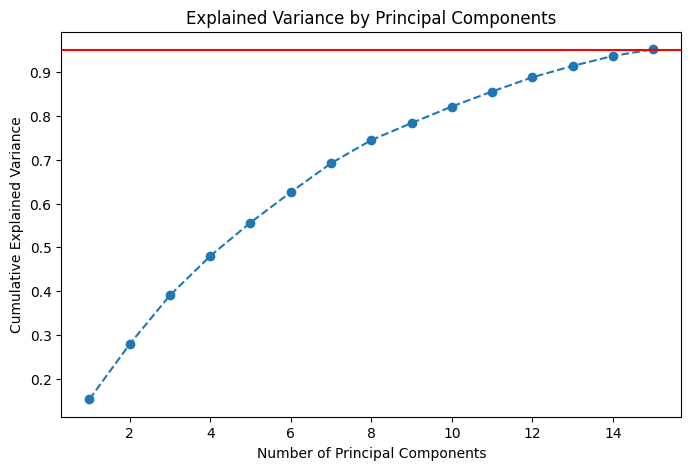

Number of components to retain for 95% variance: 15


In [645]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from imblearn.over_sampling import SMOTE

# Assuming 'X' is your feature matrix
# Scale the features
scaler = QuantileTransformer(output_distribution='normal')
X_scaled = scaler.fit_transform(X)


# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio from PCA
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# Determine the number of components to retain
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain for 95% variance: {n_components}")



In [647]:
# Get the loadings for the retained components
loadings = pca.components_[:n_components]

# Create a DataFrame to better interpret feature contributions
import pandas as pd
loading_df = pd.DataFrame(loadings, columns=X.columns, 
                          index=[f"PC{i+1}" for i in range(n_components)])
loading_df


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_2,job_3,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
PC1,-0.025238,0.004895,-0.038038,0.034015,0.107071,-0.084538,-0.066209,-0.015379,-0.034001,-0.075749,...,0.253681,0.243140,0.026409,-0.262352,0.235944,0.120743,-0.164224,0.043480,0.429244,-0.429244
PC2,0.023360,-0.000747,-0.006050,-0.005093,-0.000702,0.007365,-0.007133,-0.006633,0.004335,0.010170,...,-0.245971,-0.179420,-0.032085,0.218559,-0.186475,0.005338,0.000357,-0.005695,0.067491,-0.067491
PC3,-0.025773,-0.009048,0.041550,-0.022648,-0.101223,0.040739,0.059455,0.019417,0.016350,0.029093,...,0.301236,0.161594,0.038719,-0.224642,0.185923,-0.128608,0.156614,-0.028007,-0.456511,0.456511
PC4,0.044995,0.000097,-0.004055,0.005437,0.014408,-0.006216,-0.009031,0.008892,0.001184,-0.001259,...,0.449117,0.068900,-0.076404,0.578168,-0.501764,0.014810,-0.021902,0.007092,0.062486,-0.062486
PC5,-0.004110,-0.001555,0.043272,-0.034039,-0.108587,0.198019,0.005553,-0.009306,0.058069,0.199411,...,0.101515,-0.004779,0.031222,-0.206790,0.175568,-0.123516,0.166587,-0.043071,0.234738,-0.234738
PC6,-0.009414,-0.005702,0.075799,-0.068305,-0.278115,0.307335,0.028358,0.014729,0.098036,0.311505,...,-0.117100,0.358363,-0.023062,0.115699,-0.092637,-0.343464,0.428355,-0.084890,0.129739,-0.129739
PC7,-0.000431,0.000083,0.003111,-0.016272,-0.067119,0.067626,0.004943,0.005196,0.021305,0.068780,...,-0.001581,0.080184,0.001683,0.021641,-0.023324,-0.083588,0.103500,-0.019912,0.038704,-0.038704
PC8,0.002308,-0.006807,-0.017581,0.037510,0.141462,-0.073311,-0.000501,0.023115,-0.017498,-0.077710,...,-0.124919,0.805816,-0.058961,0.083209,-0.024248,0.171781,-0.217734,0.045953,-0.100204,0.100204
PC9,0.061820,-0.010853,0.098240,-0.002812,0.020269,0.032612,0.008705,-0.005057,0.001525,0.032596,...,0.197134,-0.033095,0.493805,-0.215999,-0.277806,0.037204,-0.031723,-0.005481,0.000642,-0.000642
PC10,-0.054370,-0.008836,0.059605,0.003935,-0.000393,-0.003464,-0.000553,-0.004325,-0.008080,-0.004784,...,-0.251046,0.019552,-0.462201,0.191616,0.270585,-0.004602,0.000783,0.003819,0.003387,-0.003387


In [661]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31, test_size=0.2, shuffle=True, stratify=y)
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)
rfc = RandomForestClassifier(random_state=31, n_jobs=-1, n_estimators=250, min_samples_leaf=35, max_depth=25)
rfc.fit(X_train, y_train)


# Checking scores
y_predict = rfc.predict(X_test)

# Predicting the accuracy score for Random Forest Classifier 
print('\n')
print('--------------Random Forest Classifier--------------')
print('\n')

print(classification_report(y_test, y_predict))



--------------Random Forest Classifier--------------


              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      7062
         1.0       0.53      0.83      0.65       897

    accuracy                           0.90      7959
   macro avg       0.75      0.87      0.79      7959
weighted avg       0.93      0.90      0.91      7959



In [658]:
from sklearn.metrics import precision_score

# Get predicted probabilities
y_probs = rfc.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.55
y_pred_adjusted = (y_probs > threshold).astype(int)

# Calculate precision
precision = precision_score(y_test, y_pred_adjusted)
print("Adjusted Precision:", precision)
print(classification_report(y_test, y_pred_adjusted))


Adjusted Precision: 0.5692438402718777
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      7062
         1.0       0.57      0.75      0.65       897

    accuracy                           0.91      7959
   macro avg       0.77      0.84      0.80      7959
weighted avg       0.92      0.91      0.91      7959



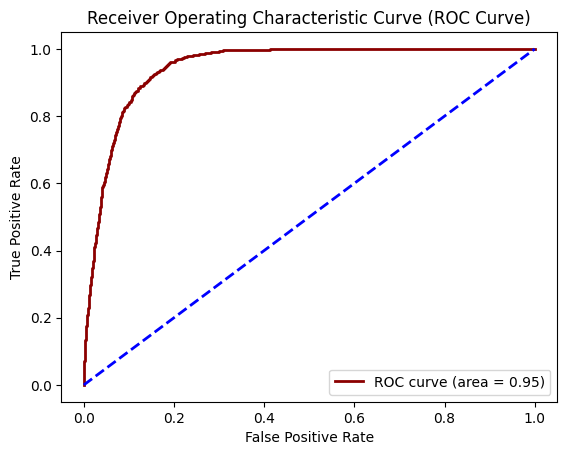

In [659]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [431]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Reduced parameter grid
params = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 20],
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt']
}

# Randomized search
rf = RandomForestClassifier(random_state=31, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=params,
                                   n_iter=20,
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=1,
                                   scoring='f1')

# Train on a subsample for faster tuning

random_search.fit(X_train, y_train)
print(random_search.best_score_)
rf_best = random_search.best_estimator_
print(rf_best)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
0.9328733291614043
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=31)


In [432]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31, test_size=0.2, shuffle=True, stratify=y)

rfc_without_smote = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200, n_jobs=-1, random_state=31)
rfc_without_smote.fit(X_train, y_train)


# Checking scores
y_predict = rfc_without_smote.predict(X_test)

# Predicting the accuracy score for Random Forest Classifier 
print('\n')
print('--------------Random Forest Classifier without smote--------------')
print('\n')

print(classification_report(y_test, y_predict))



--------------Random Forest Classifier without smote--------------


              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7062
         1.0       0.69      0.46      0.55       897

    accuracy                           0.92      7959
   macro avg       0.81      0.72      0.75      7959
weighted avg       0.91      0.92      0.91      7959



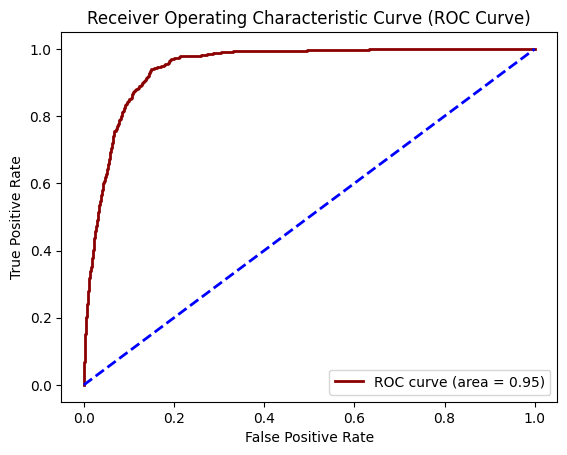

In [433]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = rfc_without_smote.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [434]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=31, test_size=0.2, stratify=y)
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

# Define the neural network architecture
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)), # Input layer + first hidden layer
    Dropout(0.1), # To prevent overfitting
    Dense(96, activation='relu'), # Second hidden layer
    Dropout(0.4),
    Dense(1, activation='sigmoid') # Output layer - Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=100,
                    verbose=1)

# Evaluate the model based on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Generate classification report
from sklearn.metrics import classification_report

# Predict on validation data
y_predict = (model.predict(X_val)>0.5).astype("int32")
print(classification_report(y_val, y_predict))

Epoch 1/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5399 - loss: 47.1474 - val_accuracy: 0.8241 - val_loss: 0.5571
Epoch 2/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6098 - loss: 0.6811 - val_accuracy: 0.7216 - val_loss: 0.6004
Epoch 3/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6399 - loss: 0.6439 - val_accuracy: 0.7541 - val_loss: 0.5685
Epoch 4/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6572 - loss: 0.6108 - val_accuracy: 0.7630 - val_loss: 0.4600
Epoch 5/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6650 - loss: 0.6027 - val_accuracy: 0.8070 - val_loss: 0.5251
Epoch 6/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6957 - loss: 0.5820 - val_accuracy: 0.7972 - val_loss: 0.5991
Epoch 7/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7088 - loss: 0.5677 - val_accuracy: 0.7923 - val_loss: 0.5101
Epoch 8/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6976 - loss: 0.5656 - val_accuracy: 0

In [435]:
from sklearn.metrics import precision_score

# Get predicted probabilities
y_probs = model.predict(X_val).flatten()

# Adjust the threshold
threshold = 0.5
y_pred_adjusted = (y_probs > threshold).astype(int)

# Calculate precision
precision = precision_score(y_test, y_pred_adjusted)
print("Adjusted Precision:", precision)
print(classification_report(y_test, y_pred_adjusted))


249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step
Adjusted Precision: 0.5836236933797909
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      7062
         1.0       0.58      0.37      0.46       897

    accuracy                           0.90      7959
   macro avg       0.75      0.67      0.70      7959
weighted avg       0.89      0.90      0.89      7959



249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step

AUC-ROC Score: 0.9180428357592112


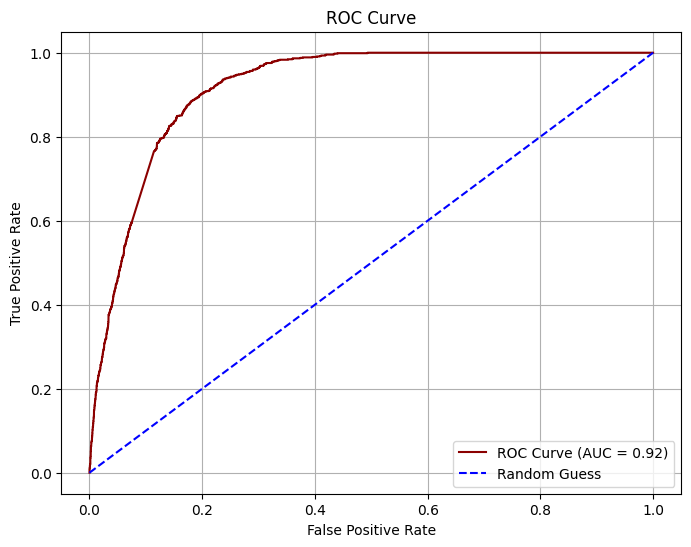

In [436]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_pred_proba = model.predict(X_val).flatten()

# Compute AUC-ROC
roc_auc = roc_auc_score(y_val, y_pred_proba)
print("\nAUC-ROC Score:", roc_auc)

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
